<a href="https://colab.research.google.com/github/GrigoryBartosh/dul_2021/blob/main/Homework/hw3/Homework3_autoregressive_flows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from utils.hw3_utils import *

from utils.hw3_model import PixelCNN
from utils.hw3_dataset import MyDataset
from torch.utils.data import DataLoader


# Question 1: Autoregressive Flows for Images

Adapt your PixelCNN implementation from Homework 2 and use it as an autoregressive flow model on the black-and-white shapes dataset. Using the base architecture from Homework 2 1(a), output a mixture of logistics or gaussians (instead of logits), whose CDF we will use as our flow for each dimension of x. 

Remember: you must dequantize the data and scale it between 0 and 1 for the autoregressive flow to have stable training. 

**You will provide these deliverables**

1.   Over the course of training, record the average negative log-likelihood (nats / dim) of the training data (per minibatch) and test data (for your entire test set). Code is provided that automatically plots the training curves. **Make sure to account for any rescaling you do in your nats/dim.**
2.   Report the final test set performance of your final model
3. 100 samples from your autoregressive flow. Our plotting code will show your samples, with and without clipping and flooring (to remove the quantization). 


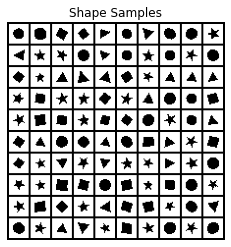

In [2]:
visualize_q1_data()

### Solution
Fill out the function below and return the necessary arguments. Feel free to create more cells if need be.

In [3]:
def q1(train_data, test_data, epochs=50, batch_size=64, lr=1e-4, l2=1e-5, device="cuda"):
    """
    train_data: A (n_train, H, W, 1) uint8 numpy array of binary images with values in {0, 1}
    test_data: A (n_test, H, W, 1) uint8 numpy array of binary images with values in {0, 1}
    H = W = 20
    Note that you should dequantize your train and test data, your dequantized pixels should all lie in [0,1]

    Returns
    - a (# of training iterations,) numpy array of train_losses evaluated every minibatch
    - a (# of epochs + 1,) numpy array of test_losses evaluated once at initialization and after each epoch
    - a numpy array of size (100, H, W, 1) of samples with values in [0, 1], where [0,0.5] represents a black pixel
        and [0.5,1] represents a white pixel. We will show your samples with and without noise. 
    """
    train = DataLoader(MyDataset(train_data), batch_size=batch_size, shuffle=True, pin_memory=True)
    test = DataLoader(MyDataset(test_data), batch_size=batch_size, pin_memory=True)
    
    model = PixelCNN((20, 20, 1), color=False).to(device)
    model, losses = model.fit(train, test, epochs=epochs, lr=lr, l2=l2)
    
    return losses["train"], losses["test"], model.sample(100)
    

### Results

Once you've implemented `q1`, execute the cells below to visualize and save your results



Fitting...: 100%|██████████| 50/50 [08:05<00:00,  9.70s/it]


Final Test Loss: -0.1319


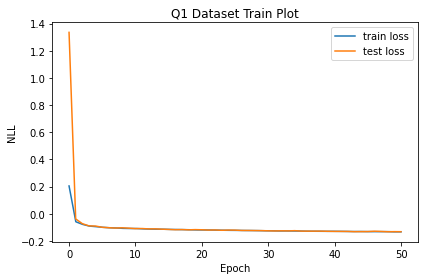

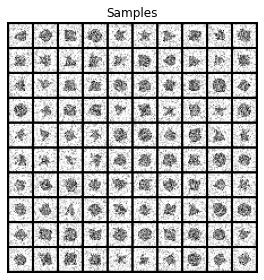

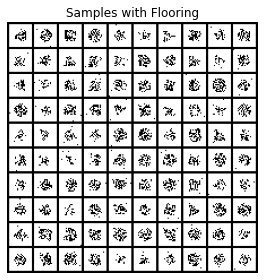

In [4]:
q1_save_results(q1)